In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [5]:
import warnings
warnings.filterwarnings(action='ignore')
#warnings.filterwarnings(Action='default')

In [6]:
## 데이터 분석 과정
## 주제 -- 수집 -- 전처리 -- EDA -- 예측시스템(회귀, 분류)--실제예측--시각화/서비스 구현
## y=ax+b, a는 기울기, b는 y절편, x는 변수값
## y = ax1+cx2+ dx3+ b
## y = 죽을것인가?/살것인가에 대한 결과 예측값
## x1, x2, x3가 결과를 결정하는 변수들
## => age, pclass, alone

In [7]:
raw_data = pd.read_excel('../csv-data/titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
svc = raw_data['survived'].value_counts()
svc.index = ['dead', 'alive']
svc

dead     809
alive    500
Name: survived, dtype: int64

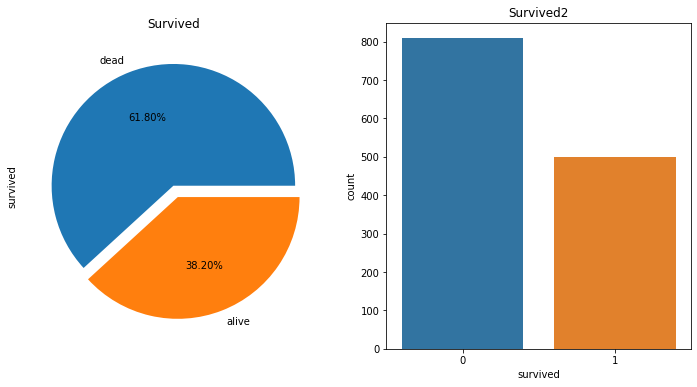

In [11]:
f, ax = plt.subplots(1,2,figsize=(12,6))
# raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], 
#                                              autopct='%1.2f%%', ax=ax[0])
svc.plot.pie(explode=[0,0.1], 
                                             autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
sns.countplot('survived', data=raw_data, ax = ax[1])
ax[1].set_title('Survived2')
plt.show()


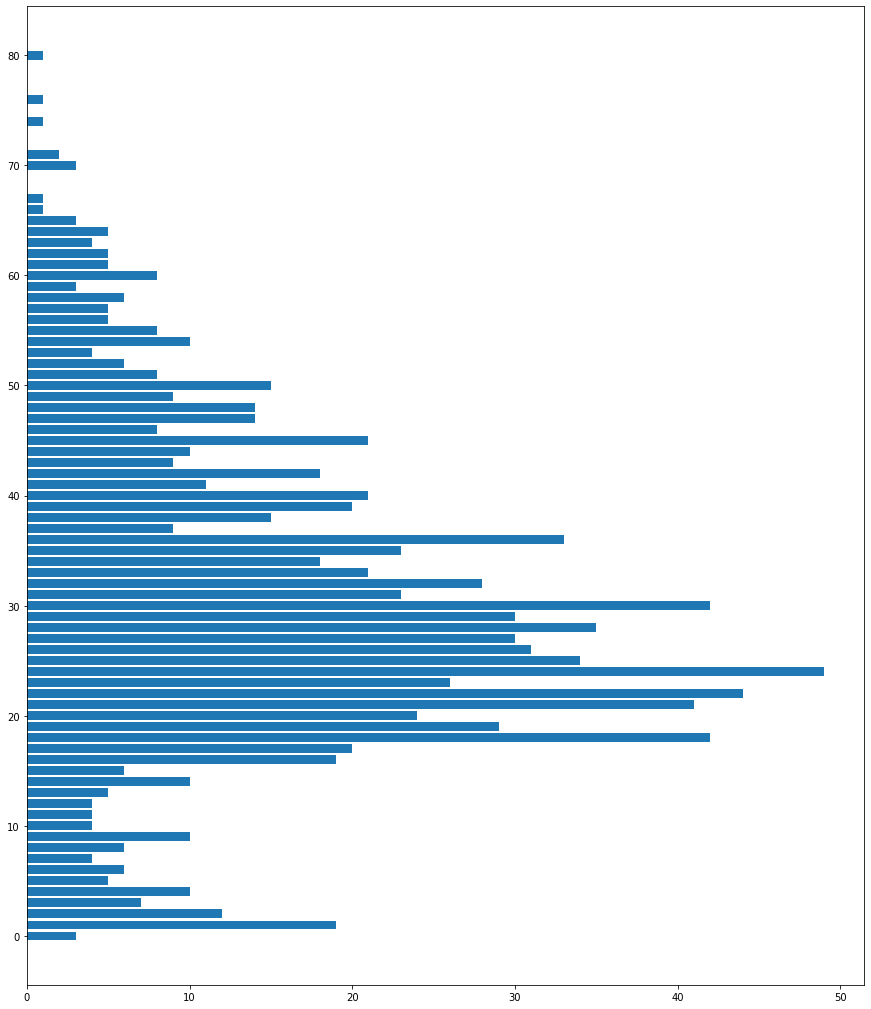

In [12]:
## age의 분포를 그려보세요.
plt.figure(figsize=(15,18))
plt.barh(raw_data['age'].round().value_counts().index, raw_data['age'].round().value_counts())
plt.show()

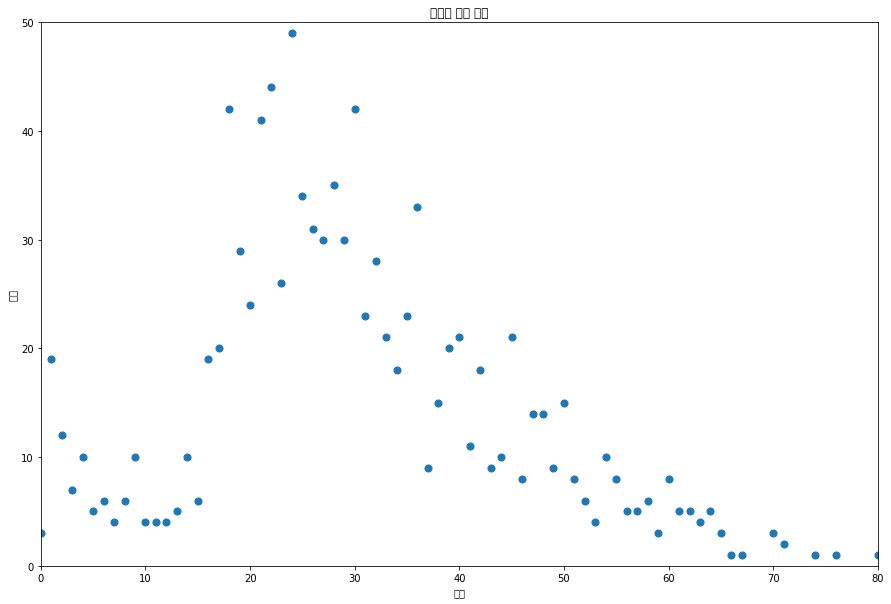

In [13]:
np.random.seed(0)
arr = np.random.standard_normal((8, 25))
plt.figure(figsize=(15,10))
plt.scatter(raw_data['age'].round().value_counts().index, raw_data['age'].round().value_counts(), s=50)

# plt.plot(fx, f4(fx), ls ='dashed' ,c='r')
# for i in range(len(raw_data['age'].round().value_counts().index)):
#     plt.annotate(raw_data['age'].round().value_counts().index[i], (raw_data['age'].round().value_counts().index[i], raw_data['age'].round().value_counts()[i] + 0.2))
plt.xlabel('나이')
plt.ylabel('인원')
plt.title('나이에 따른 인원')
plt.xlim(0,80)
plt.ylim(0,50)
plt.spring()
plt.show()

In [14]:
## pclass별 평균
raw_data.groupby(by='pclass').mean()
# raw_data['pclass'].value_counts()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [15]:
## 변수들간의 상관도
rd_corr = raw_data.corr()
rd_corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


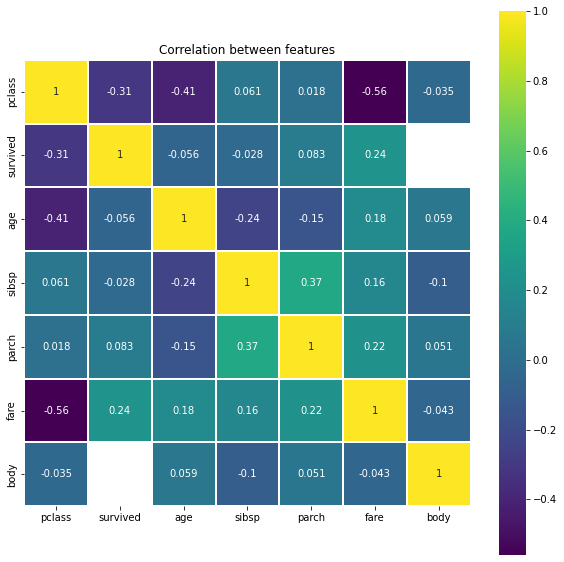

In [16]:
## heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(rd_corr, linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [17]:
# 성별 카운트
raw_data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [18]:
##성별 생사인원
raw_data.groupby(by='sex').mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [19]:
# sibsp: 함께 탑승한 형제 자매나 배우자수
# parch: 함께 탑승한 부모나 자녀의 수

In [20]:
## age가 결측치(NaN)가 들어있는데,
# 어떻게 해야하는가?
# 1. 컬럼을 삭제 : 너무 결측치가 많은 경우, 상관도가 다른 변수들에 비해서 많이 낮은 경우
# 2. 행삭제 : 결측치가 있는 instance만 삭제, 행을 삭제해도 다른 해instance가 많이 남아있는 경우
# 3. 다른 값으로 대체: 대체해도 크게 문제가 없을 때나, 다른 instance가 많지 않은 경우 
# 다른 값>>숫자인 경우: 0(최소값), 평균치(전체 데이터의 분포를 깨지 않을 목적)
#          문자인 경우: 해당사항 없음, 값을 목록을 만들어서 랜덤하게 넣음


In [21]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [22]:
## 나이대별 카운트
rd_sex = raw_data['sex'].value_counts()
rd_sex

male      843
female    466
Name: sex, dtype: int64

In [23]:
list(rd_sex)

[843, 466]

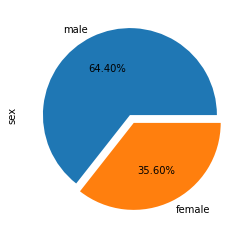

In [24]:
rd_sex.plot.pie(explode=[0,0.1], autopct='%1.2f%%')

plt.show()

In [25]:
#나이를 평균으로 대체하려고 함
## 나이의 평균을 구해주세요
age_mean = raw_data['age'].mean()
print(age_mean)

## age컬럼중에 nan을 평균으로 대체해주세요
raw_data['age'].fillna(age_mean, inplace=True)
##nan이 있는지 없는지 결과를 확인
raw_data['age'].isnull().sum()


29.8811345124283


0

In [26]:
## 나이대별 값의 범위가 너무 많아서 범위를 묶기로 함.
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0,20,35,55, 100], include_lowest=True, labels=["children", "young", "adult", "old"])
raw_data['age_cat'][:5]

raw_data.head(2)

# 컬럼 삭제: ticket, cabin, embarked, body, boat, home.dest
raw_data.drop(columns=['ticket', 'cabin', 'embarked', 'body', 'boat', 'home.dest'], inplace=True)
raw_data.head(2)



,pclass,survived,name,sex,age,sibsp,parch,fare,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,children


In [27]:
# age_cat별 평균을 내보세요.
raw_data.groupby(by='age_cat').mean()

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
children,2.568548,0.459677,12.782930,0.991935,0.745968,29.025169
young,2.442490,0.350474,28.124139,0.381597,0.217862,26.865154
adult,1.806084,0.410646,43.699620,0.403042,0.509506,47.149810
old,1.474576,0.322034,62.161017,0.322034,0.406780,70.663722


In [28]:
sex_df = pd.DataFrame({'alive':list(raw_data['survived']), 'board':list(raw_data['sex'])}, index=['male', 'female'])
sex_df

ValueError: Shape of passed values is (1309, 2), indices imply (2, 2)

In [29]:
dead_result = sex_

NameError: name 'sex_' is not defined

In [30]:
def func(x):
    if x=='female':
        return 0
    else:
        return 1

In [43]:
raw_data['sex'] = raw_data['sex'].apply(func)
raw_data['sex'][:2]

0    0
1    1
Name: sex, dtype: int64

In [44]:
## age_cat 'children' : 0, 'young : 1' ,'adult : 2','old : 3'
def func2(x):
    if x == 'children':
        return 0
    elif x == 'young':
        return 1
    elif x == 'adult':
        return 2
    else:
        return 3

In [45]:
raw_data['age_cat'] = raw_data['age_cat'].apply(func2)
raw_data['age_cat'][:2]

0    1
1    0
Name: age_cat, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [46]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   int64   
 2   name      1309 non-null   object  
 3   sex       1309 non-null   int64   
 4   age       1309 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   fare      1309 non-null   float64 
 8   age_cat   1309 non-null   category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 83.4+ KB


In [47]:
raw_data['fare'].isnull().sum()

0

In [48]:
raw_data['fare'].fillna(raw_data['fare'].mean(), inplace=True)

In [49]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   int64   
 2   name      1309 non-null   object  
 3   sex       1309 non-null   int64   
 4   age       1309 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   fare      1309 non-null   float64 
 8   age_cat   1309 non-null   category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 83.4+ KB


In [50]:
## 1. 먼저 공부를 많이 하고 (연습용 데이터, 훈련대이터, train data)
## 2. 모의고사 (75점 이상) (검증용 데이터, test data)
## => data를 나누어보자!

## 3. 실제로 예측하는 프로그램 사용할 예정 -> 본시험! 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_data = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'age_cat', 'survived',]]

In [53]:
df_data

,pclass,sex,age,sibsp,parch,fare,age_cat,survived
0,1,0,29.000000,0,0,211.3375,1,1
1,1,1,0.916700,1,2,151.5500,0,1
2,1,0,2.000000,1,2,151.5500,0,0
3,1,1,30.000000,1,2,151.5500,1,0
4,1,0,25.000000,1,2,151.5500,1,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542,0,0
1305,3,0,29.881135,1,0,14.4542,1,0
1306,3,1,26.500000,0,0,7.2250,1,0
1307,3,1,27.000000,0,0,7.2250,1,0
